In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 8)})
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
import re

In [2]:
df = pd.read_csv('datasets/patient-doctor.csv')
df

,Patient,Doctor
0,hello good morning doctor,good morning how are you feeling today
1,ive been feeling quite anxious lately its been...,i see can you tell me more about what might be...
2,i think its mainly related to my job and the p...,stress at work can definitely take a toll on o...
3,i work in a highly demanding environment and i...,that sounds tough do you have any support or c...
4,i try to talk to my friends but they dont alwa...,having a strong support system is important le...
...,...,...
1894,thank you for your understanding and guidance ...,youre welcome remember im here to help you nav...
1895,hi ive been struggling with selfdoubt lately,hello im here to support you through your feel...
1896,its hard for me to believe in myself when im c...,selfdoubt can be challenging but remember that...
1897,im afraid of failure and disappointing others,fear of failure is common but remember that mi...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Patient  1899 non-null   object
 1   Doctor   1899 non-null   object
dtypes: object(2)
memory usage: 29.8+ KB


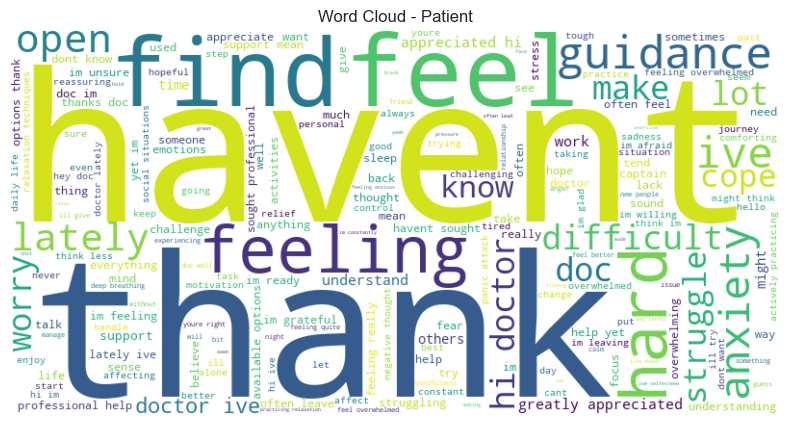

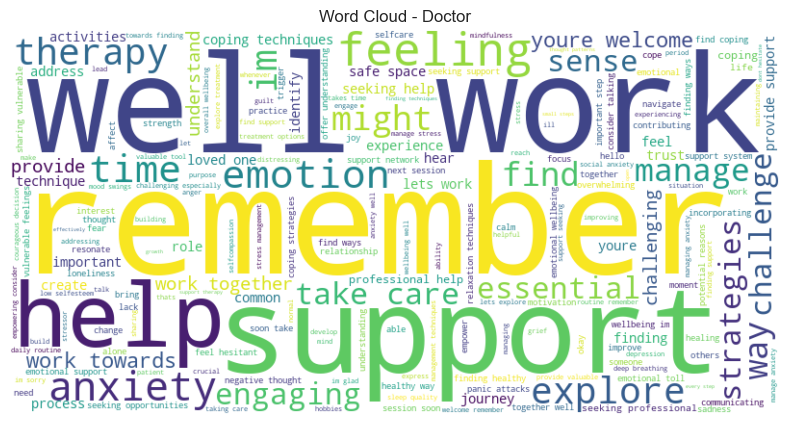

In [4]:
# Word Clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_word_cloud(' '.join(df['Patient']), 'Word Cloud - Patient')
plot_word_cloud(' '.join(df['Doctor']), 'Word Cloud - Doctor')

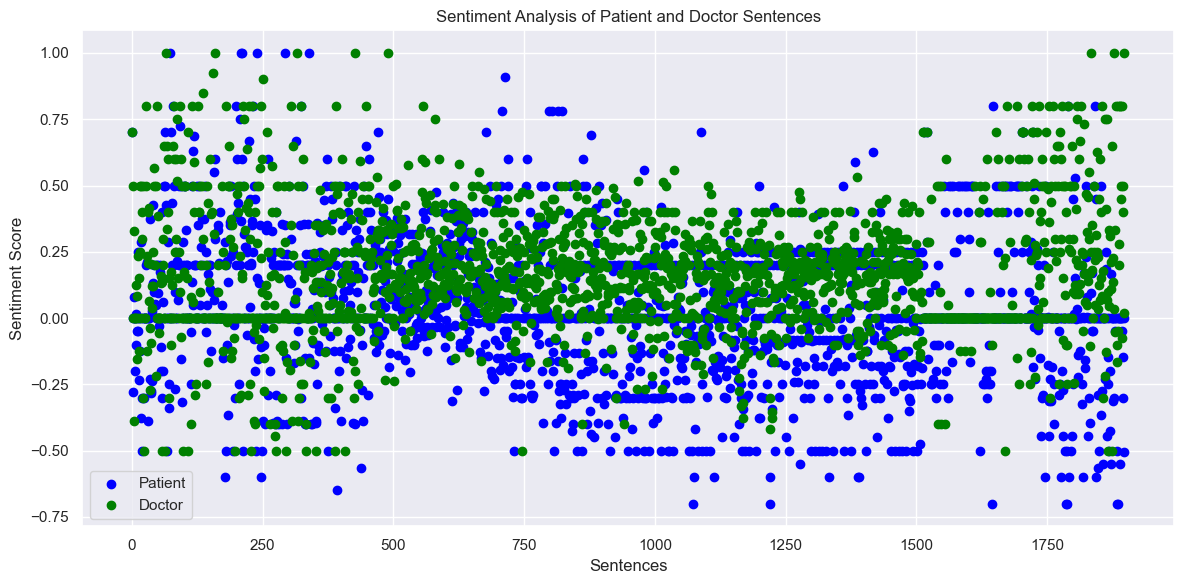

In [5]:
# Sentiment analysis using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Patient_Sentiment'] = df['Patient'].apply(get_sentiment)
df['Doctor_Sentiment'] = df['Doctor'].apply(get_sentiment)

# Plotting sentiment analysis results
plt.figure(figsize=(12, 6))

plt.scatter(df.index, df['Patient_Sentiment'], color='blue', label='Patient')
plt.scatter(df.index, df['Doctor_Sentiment'], color='green', label='Doctor')

plt.xlabel('Sentences')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Patient and Doctor Sentences')
plt.legend()
plt.tight_layout()

plt.show()

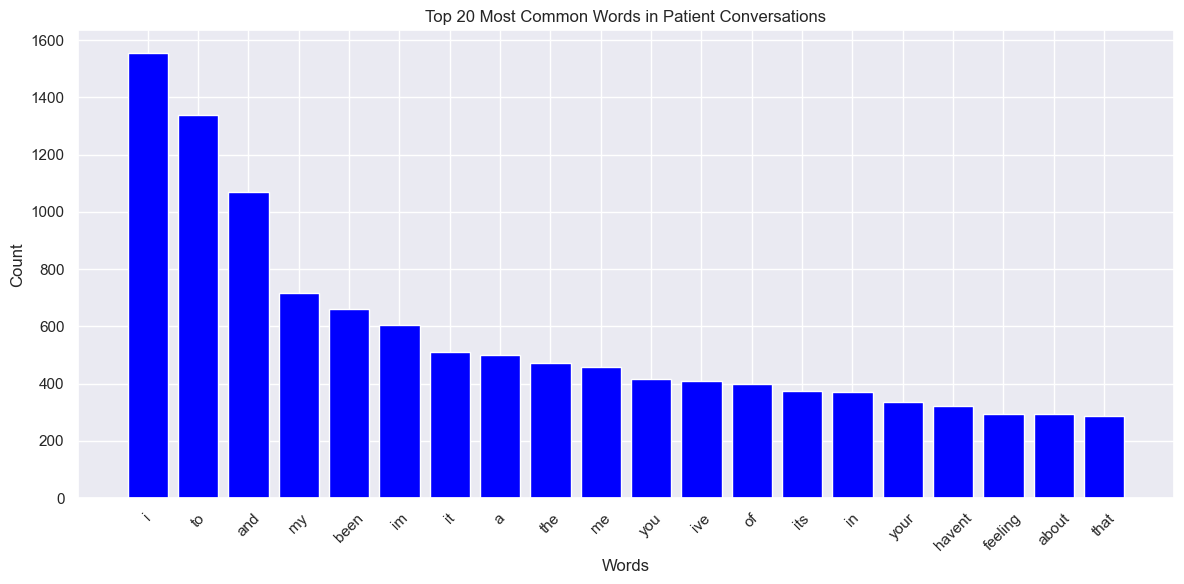

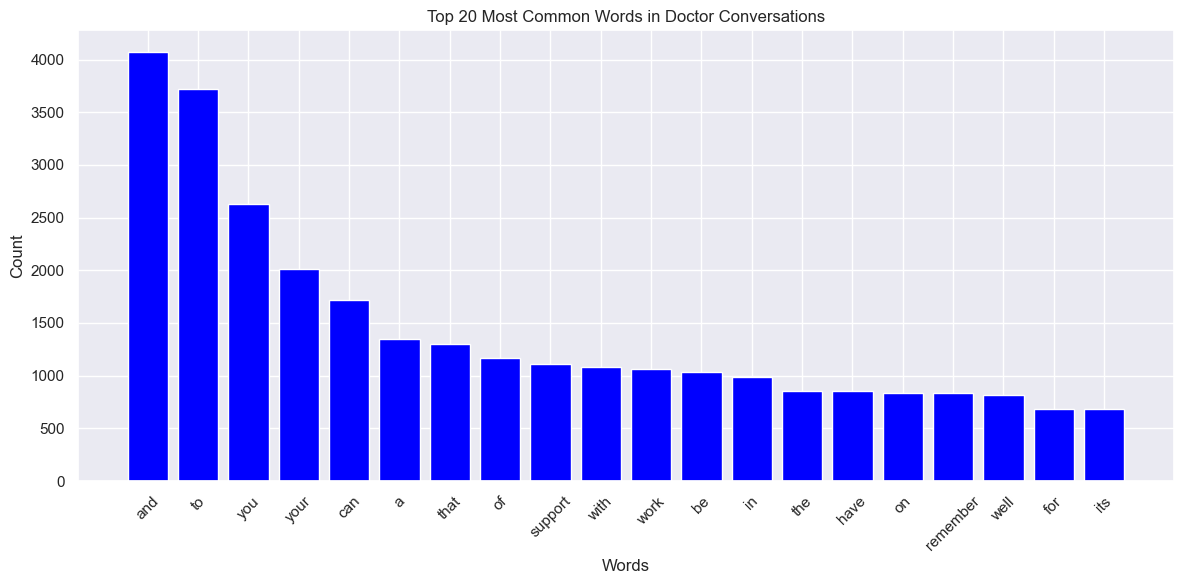

In [6]:

def get_top_words(texts, top_n=20):
    all_words = ' '.join(texts)
    words = re.findall(r'\w+', all_words)
    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)
    return top_words

def plot_top_words(top_words, title):
    words, counts = zip(*top_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Combine both 'Patient' and 'Doctor' text
patient_text = df['Patient'].tolist()
doctor_text = df['Doctor'].tolist()

# Get the top 20 most common words
top_words_p = get_top_words(patient_text, top_n=20)
top_words_d = get_top_words(doctor_text, top_n=20)

# Plot the top words
plot_top_words(top_words_p, 'Top 20 Most Common Words in Patient Conversations')
plot_top_words(top_words_d, 'Top 20 Most Common Words in Doctor Conversations')